# calculations

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## stocks

stel in de plaats van alles 100 euro per maand op een spaarrekening te zetten, ga ik voor 20 jaar beleggen. Hoeveel winst maak ik dan?  
alle waarden zijn nominaal, dus zonder inflatie

In [12]:
#the input parameters
P = 100

#stock market return
r_yearly = 0.08

#number of years
n_years = 20

In [19]:
#de berekeningen volgen hier
r_monthly = (1+r_yearly)**(1/12) - 1

#number of months
num_months = n_years*12


#FV stands for future value
FV = P*((1+r_monthly)**num_months -1)/r_monthly

PV = P*num_months

In [64]:
# make now a numerical calculation and make a graph just to be certain
current_FV = 0
current_FV_array = []
current_PV_array = []
month_array = np.arange(0, num_months,1)
for ii in month_array: 
    current_PV = P*(ii+1)
    current_PV_array += [current_PV]
    
    current_FV = current_FV*(1+r_monthly) + P
    current_FV_array += [current_FV]

compairison_df = pd.DataFrame({'month': month_array,
                              'PV': current_PV_array,
                              'FV': current_FV_array})

melted_compairison_df = pd.melt(compairison_df, id_vars=['month'], var_name='type', value_name='value')
#column to give the year instead of month
melted_compairison_df.loc[:, 'year'] = melted_compairison_df['month']/12
melted_compairison_df

,month,type,value,year
0,0,PV,100.000000,0.000000
1,1,PV,200.000000,0.083333
2,2,PV,300.000000,0.166667
3,3,PV,400.000000,0.250000
4,4,PV,500.000000,0.333333
...,...,...,...,...
475,235,FV,55065.131206,19.583333
476,236,FV,55519.421918,19.666667
477,237,FV,55976.635550,19.750000
478,238,FV,56436.790909,19.833333


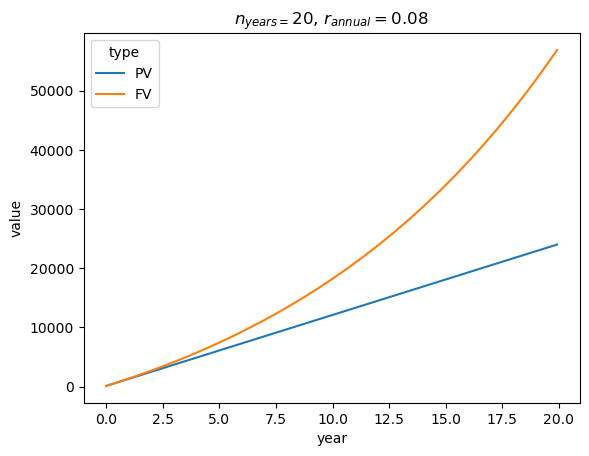

In [65]:

sns.lineplot(data=melted_compairison_df, x = 'year', y = 'value', hue = 'type')
plt.title('$n_{years = }$' + str(n_years) + ', $r_{annual} = $' + str(r_yearly))
plt.show()

## loans

Hoeveel kost een lening per maand als je hem kunt aflossen met x budget en hoe lang zou je dan moeten lenen? Wat is zeg maar de huurprijs van het geld in het begin en naar het einde toe? want je betaalt rent op de uitstaande schuld

In [12]:
#de prijs van een gemiddeld appartement in Gent
P = 300000
n_years = 20
r_yearly = 0.04

In [101]:
def calculate_MPT(P, n_years, r_yearly):
    r_monthly = r_yearly/12
    n_months = n_years*12
    MPT = P*r_monthly*(1+r_monthly)**n_months/((1+r_monthly)**n_months-1)
    return MPT

In [26]:
((MPT*n_months)/P-1)*100

45.435279031858265

je betaalt dus voor 45 percent eig gewoon rentelasten!

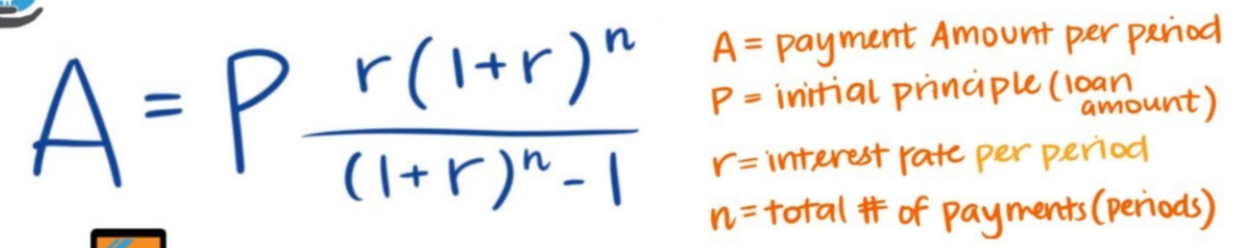

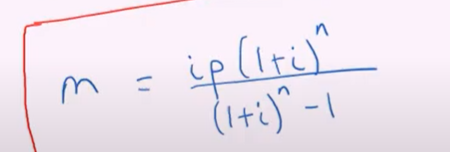

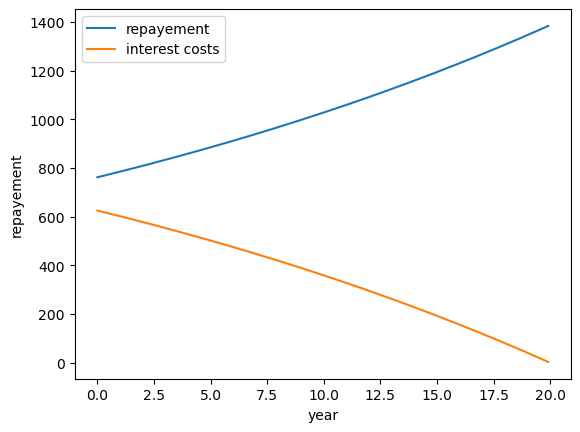

In [133]:
P = 250000
r_yearly = 0.03
n_years = 20


def get_repayement_and_interest_amount(P, n_years, r_yearly): 
    MPT = calculate_MPT(P, n_years, r_yearly)
    r_monthly =r_yearly/12
    #MRPT #montly repayement
    current_debt = P #in the first month, the depth is equal to the amount you need to give the bank
    #the current repayement is how much of your loan you've been able to pay that month
    current_repayement_array = []
    current_interest_costs_array = []
    month_array = []
    for ii in range(1000): 
        month_array += [ii]
        current_repayement = MPT-current_debt*r_monthly
        current_repayement_array += [current_repayement]
        current_interest_costs = MPT-current_repayement
        current_interest_costs_array += [current_interest_costs]
        current_debt = current_debt-current_repayement
        if current_debt < 0: 
            break
    
    df = pd.DataFrame({
        'month': month_array, 
        'year': np.array(month_array)/12,
        'repayement': current_repayement_array, 
        'interest_costs': current_interest_costs_array,
    })

    return df
    
df = get_repayement_and_interest_amount(P,n_years, r_yearly)

sns.lineplot(data = df, x = 'year', y = 'repayement', label='repayement')
sns.lineplot(data = df, x = 'year', y = 'interest_costs', label = 'interest costs')

plt.show()

### repayement costs as a function of time

In [1]:
n_years_array = np.arange(15,40, 1)
total_interest_cost_array = []
for n_years in n_years_array:
    df = get_repayement_and_interest_amount(P, n_years, r_yearly)
    total_interest_cost = df['interest_costs'].sum()
    total_interest_cost_array += [total_interest_cost]

df = pd.DataFrame({'year': n_years_array,
                  'total_interest_costs': total_interest_cost_array})
    

NameError: name 'np' is not defined

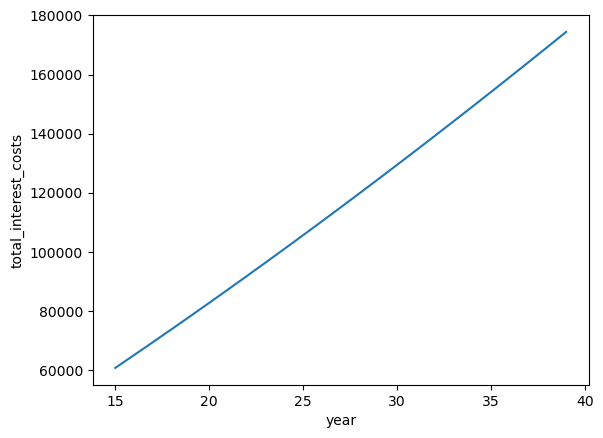

In [140]:
sns.lineplot(data = df, x = 'year', y = 'total_interest_costs')
plt.show()

## calcutions on how long to save for appartment

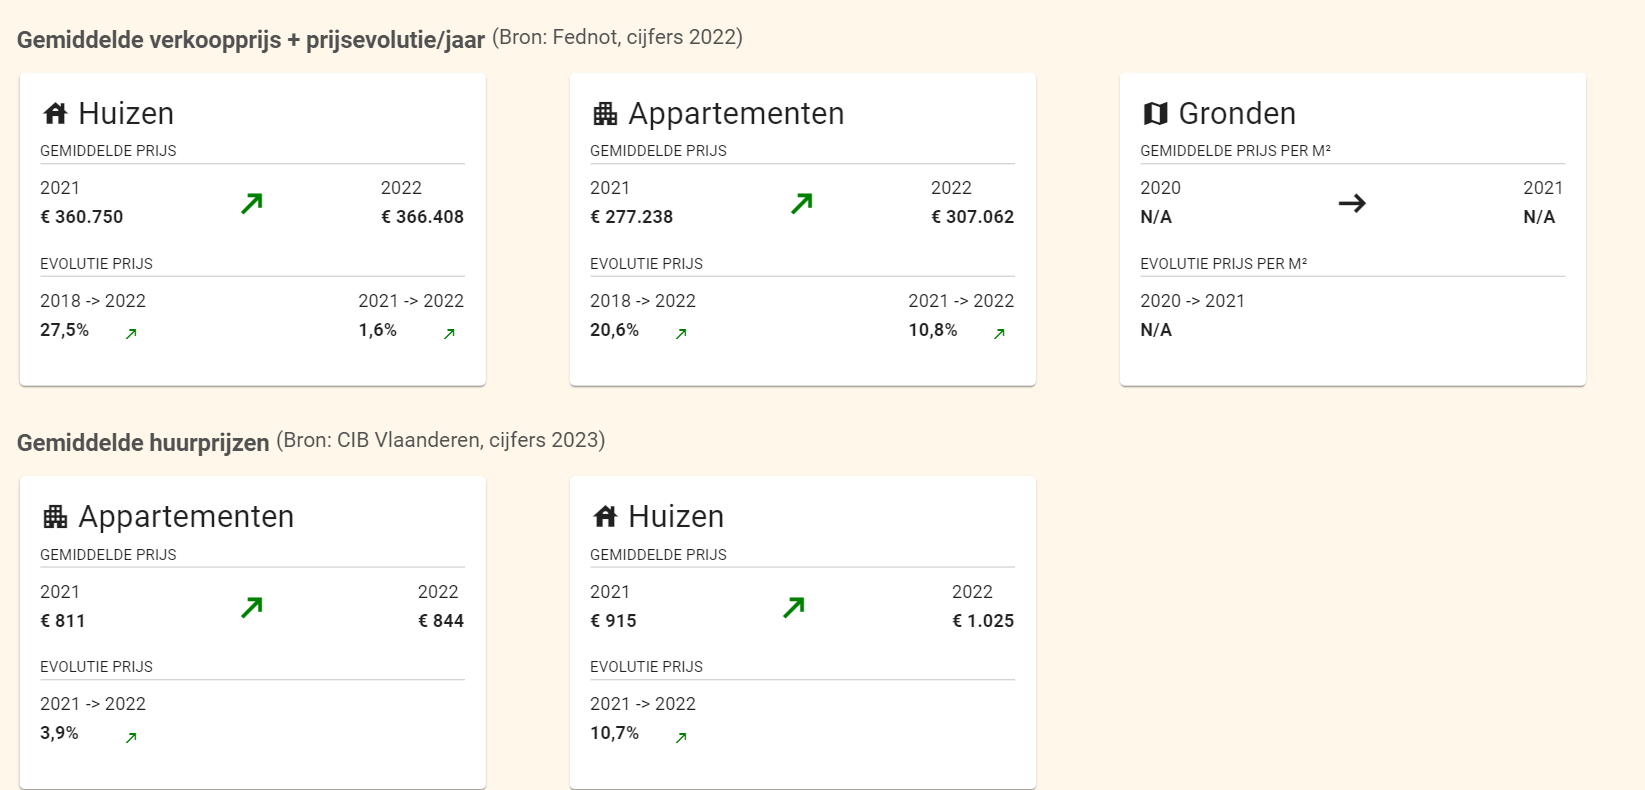

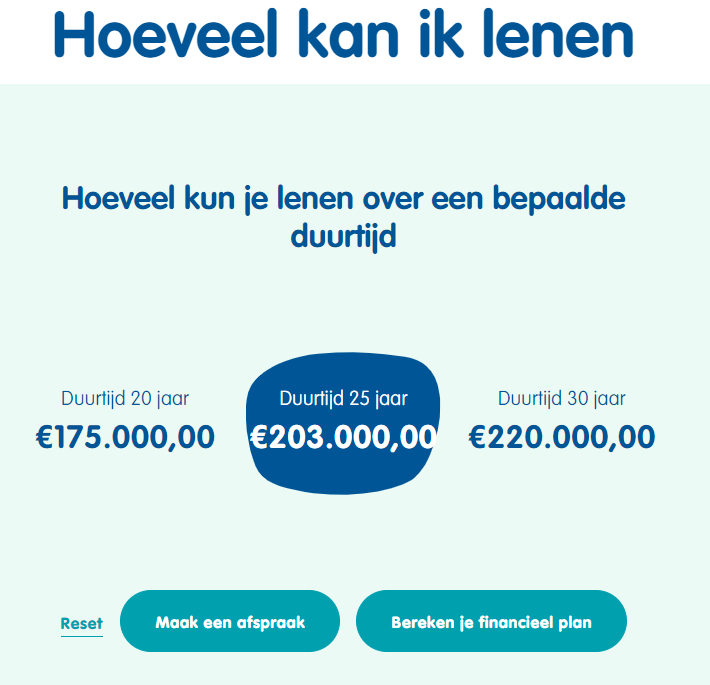

stel ik wil op 20 jaar afbetalen, dan moet ik dus eigenlijk 175k euro inleggen. Hoe lang duurt het eer ik dat kan sparen? 
Ik heb wel al 25k van op mijn spaarrekening. dus 150k moet ik nog zelf inleggen.  
Stel ik kan 1000 euro per maand sparen, dan moet ik 150 maanden sparen. Dat is meer dan 10 jaar, dus gigantish veel. Eigenlijk is het gewoon onmogelijk om als aleenstaande iets te kopen in het begin. Note: In deze berekeningen zit mijn diploma niet in, ben ik alleenstaand en is gebaseerd op het loon dat ik heb in het begin, terwijl dat volgend jaar al stijgt. 

In [1]:
apparment_price = 350000
